In [27]:
import numpy as np
import cv2
import IPython.display as display
from PIL import Image
import io
import matplotlib.pyplot as plt

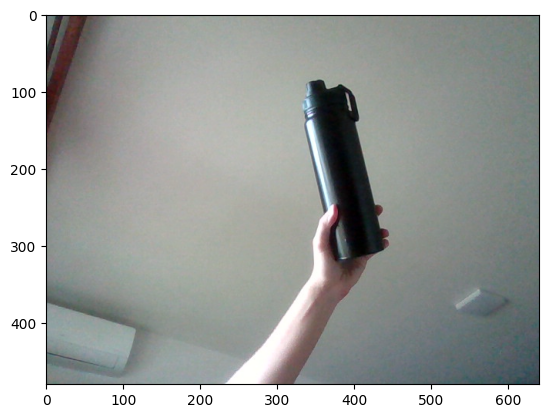

In [199]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
ret, frame = cap.read()
cap.release()
img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


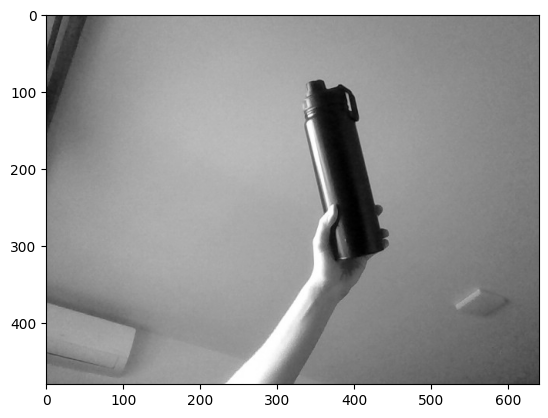

In [200]:
img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

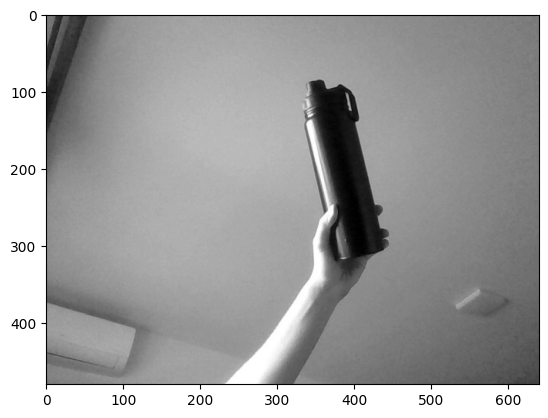

In [220]:
alpha = .4
beta = 5

img_contrast = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)
plt.imshow(img_contrast, cmap='gray')

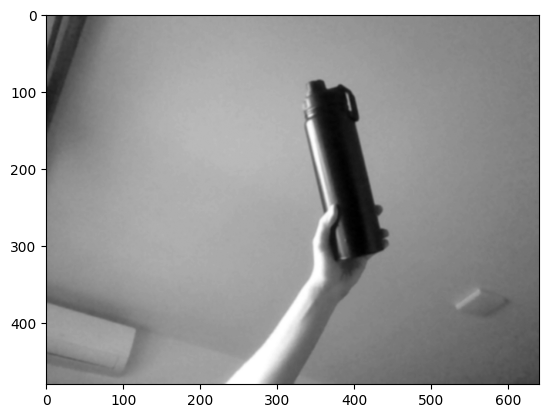

In [221]:
kerel_size = (5, 5)

img_blurred = cv2.GaussianBlur(img_contrast, kerel_size, 0)
plt.imshow(img_blurred, cmap='gray')

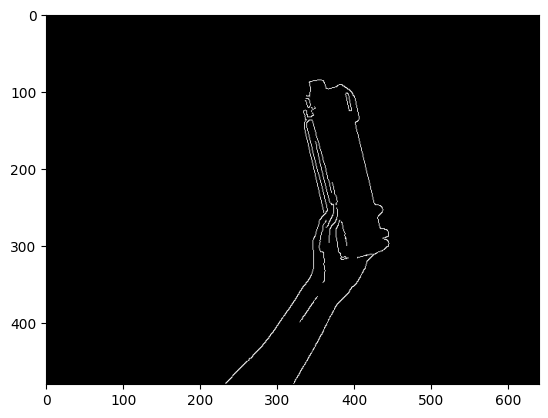

In [222]:
median_intensity = np.median(img_blurred)

min_val = int(max(0, (1.0 - 0.33) * median_intensity))
max_val = int(min(255, (1.0 + 0.33) * median_intensity))

img_edged = cv2.Canny(img_blurred, min_val, max_val)
plt.imshow(img_edged, cmap='gray')

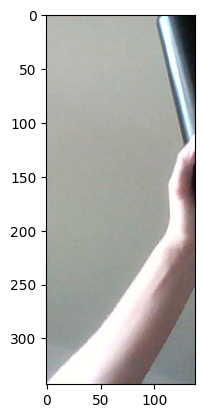

In [223]:
contuors, hierarchy = cv2.findContours(img_edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contuors, key=cv2.contourArea)
x ,y , w, h = cv2.boundingRect(largest_contour)
img_croped = frame[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(img_croped, cv2.COLOR_BGR2RGB))